In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [60]:
street_map = gpd.read_file('LA_STREET/CAMS_ZIPCODE_STREET_SPECIFIC.shp')
#street_map = gpd.read_file('LA_Parcels/CAMS_ZIPCODE_PARCEL_SPECIFIC.shp')

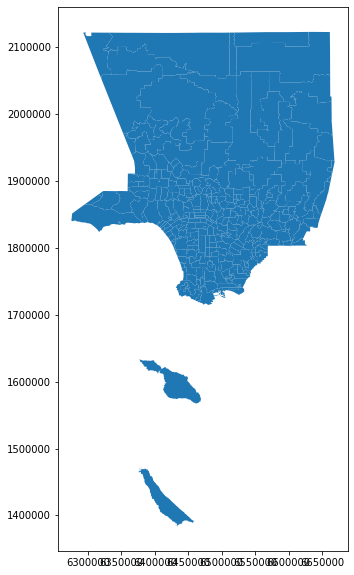

In [129]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax)

In [62]:
df = pd.read_csv('../data/sensor_graph_arterial/dcrnn_arterial_sensors_clean.csv')

In [63]:
df.head(10)

,link_id,longitude,latitude
0,2152-S,-118.258224,34.037151
1,14349-N,-118.236893,34.111629
2,11300-N,-118.330818,33.970657
3,14086-E,-118.212662,34.054523
4,3110-N,-118.321198,34.105015
5,5246-N,-118.251930,34.027569
6,11148-S,-118.247551,33.953609
7,4097-N,-118.431221,33.935566
8,14109-W,-118.220726,34.047329
9,4107-E,-118.404274,33.931271


In [64]:
#geometry = [Point(xy) for xy in zip(df1["longitude"], df1("latitude"))]
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geometry[:3]

In [65]:
crs = {'init': 'epsg:4326'} #coordinate reference system
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

/home/users/anandgok/anaconda3/envs/anandgok-dcrnn/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [66]:
df['link_id']

0        2152-S
1       14349-N
2       11300-N
3       14086-E
4        3110-N
         ...   
7754     4270-E
7755     5301-N
7756     5029-E
7757     1107-E
7758     5149-W
Name: link_id, Length: 7759, dtype: object

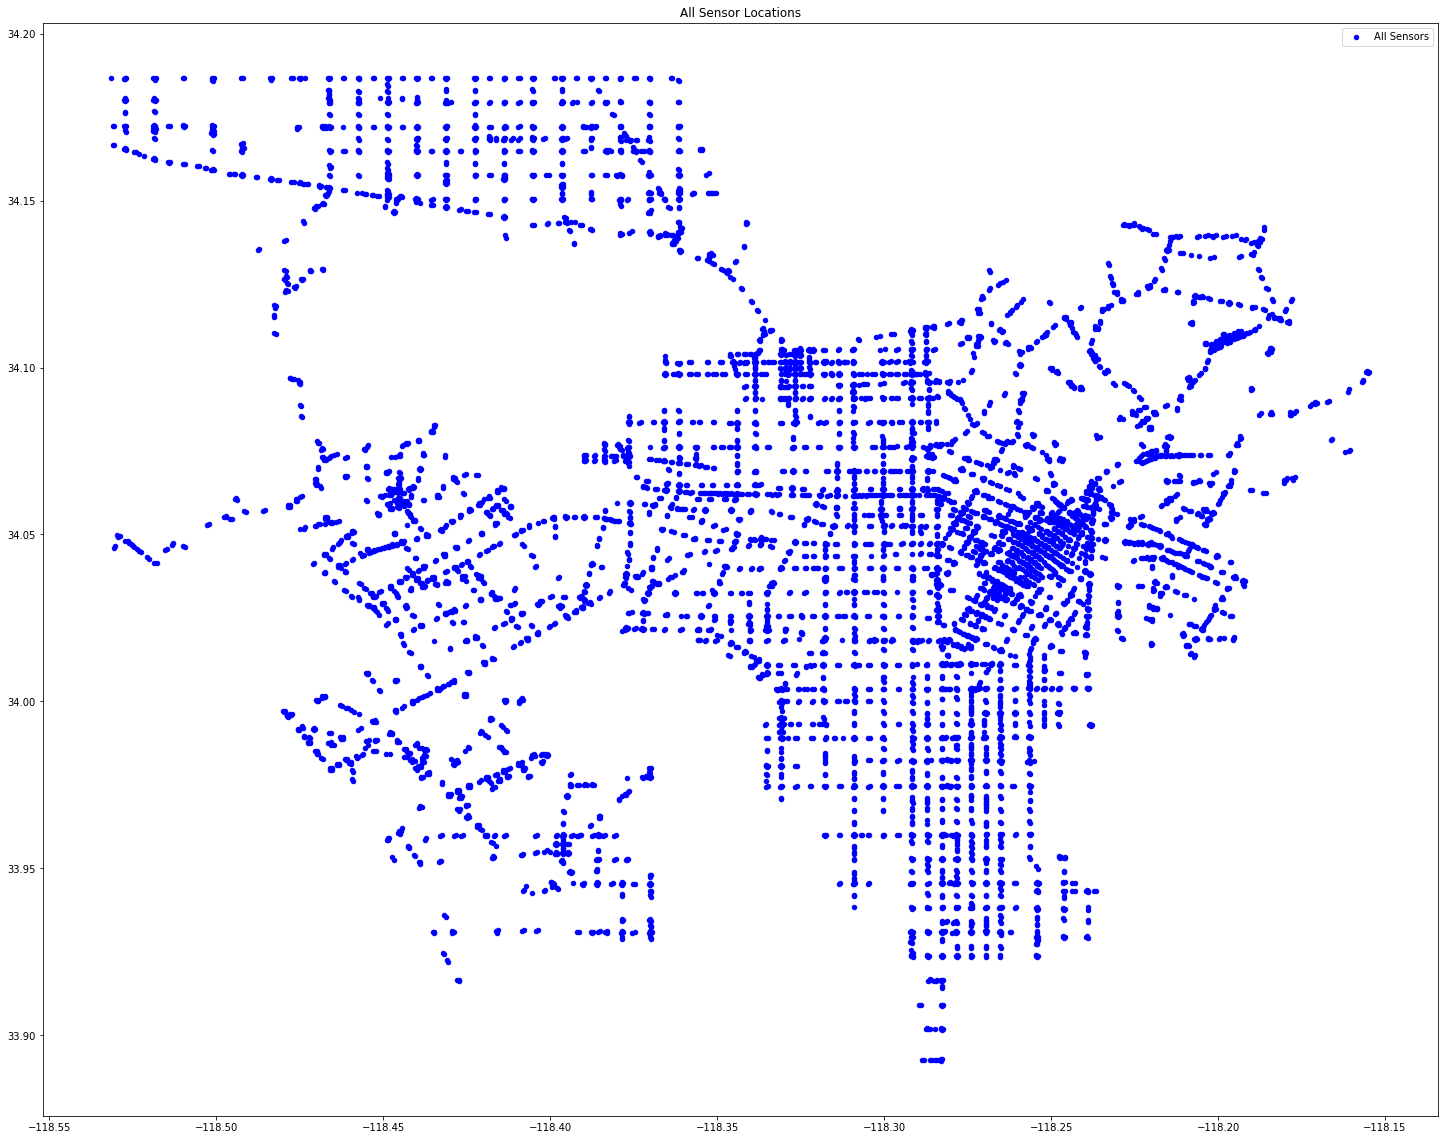

In [75]:
fig, ax = plt.subplots(figsize = (25,25))
#spray_locs.geometry.plot(marker='d', color='blue', markersize=1, ax=ax, label = 'Spray Loc')
#street_map.plot(color='grey', ax=ax, alpha = 0.4)
geo_df[geo_df['link_id']!='0'].geometry.plot(marker='o', color = 'blue', ax = ax, label = 'All Sensors', markersize = 20 )
#geo_df[geo_df['WnvPresent']==1].geometry.plot(marker='o', color = 'red', ax = ax, label = 'WNV+', alpha = .5, markersize = 10)
# at first glance, it looks as though WNV- mosquitos were found alongside WNV+ mosquitos everytime a WNV+ mosquito was found
    #however, there are lots of instances where WNV- mosquitos were found with WNV+ mosquitos


plt.title('All Sensor Locations')
plt.legend()

In [68]:
'''

Using the Partitions

'''

'\n\nUsing the Partitions\n\n'

In [93]:
sensorsInPartition = {}
for i in range(0,15):
    sensorsInPartition[i] = list(np.load('../data/results/originalSensorIDListofPartition'+str(i)+'.npy'))

In [107]:
listoflink_ids = list(df.link_id)

In [108]:
#Creating a list which says the partition ID of each sensor
listofpartitionids=[]

for i in range(0,len(listoflink_ids)):
    for j in range(0,len(sensorsInPartition.keys())):
        if listoflink_ids[i] in sensorsInPartition[j]:
            listofpartitionids.append(j)

In [112]:
df['PartitionID'] = listofpartitionids

In [113]:
df.head(10)

,link_id,longitude,latitude,geometry,PartitionID
0,2152-S,-118.258224,34.037151,POINT (-118.25822 34.03715),10
1,14349-N,-118.236893,34.111629,POINT (-118.23689 34.11163),12
2,11300-N,-118.330818,33.970657,POINT (-118.33082 33.97066),3
3,14086-E,-118.212662,34.054523,POINT (-118.21266 34.05452),12
4,3110-N,-118.321198,34.105015,POINT (-118.32120 34.10502),1
5,5246-N,-118.251930,34.027569,POINT (-118.25193 34.02757),7
6,11148-S,-118.247551,33.953609,POINT (-118.24755 33.95361),7
7,4097-N,-118.431221,33.935566,POINT (-118.43122 33.93557),6
8,14109-W,-118.220726,34.047329,POINT (-118.22073 34.04733),11
9,4107-E,-118.404274,33.931271,POINT (-118.40427 33.93127),6


In [136]:
colors = ['red','hotpink', 'blue', 'tomato', 'green', 'brown', 'cyan', 'gray', 'orange', 'black', 'purple', 'navyblue', 'coral', 'darkolivegreen', 'crimson']



EXCEPTION: Color attribute has to be a single color or sequence of colors.


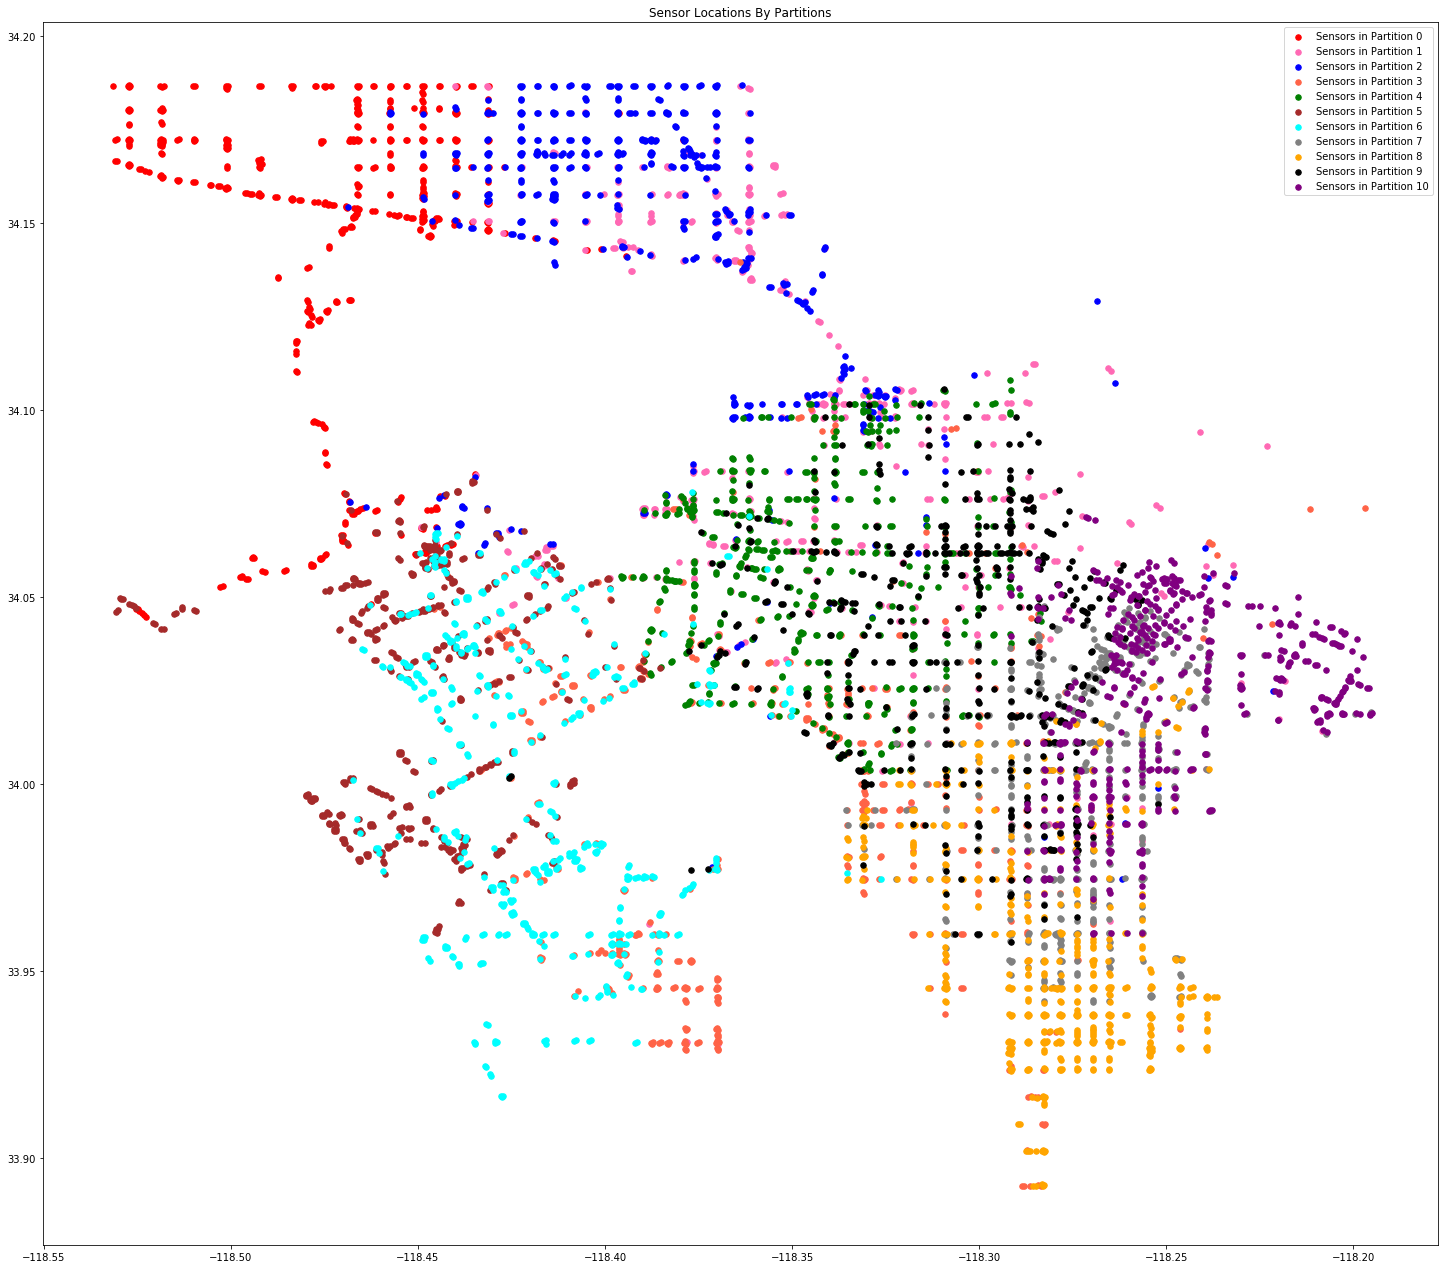

In [139]:
fig, ax = plt.subplots(figsize = (25,25))
#spray_locs.geometry.plot(marker='d', color='blue', markersize=1, ax=ax, label = 'Spray Loc')
#street_map.plot(color='grey', ax=ax, alpha = 0.4)
#geo_df[geo_df['link_id']!='0'].geometry.plot(marker='o', color = 'blue', ax = ax, label = 'All Sensors', markersize = 20 )
#geo_df[geo_df['WnvPresent']==1].geometry.plot(marker='o', color = 'red', ax = ax, label = 'WNV+', alpha = .5, markersize = 10)
# at first glance, it looks as though WNV- mosquitos were found alongside WNV+ mosquitos everytime a WNV+ mosquito was found
    #however, there are lots of instances where WNV- mosquitos were found with WNV+ mosquitos

try:
    for i in range(0,len(sensorsInPartition.keys())):
        currentcolor = colors[i]
        if i%2==0:
            currentmarker='o'
        else:
            #currentmarker='^'
            currentmarker='o'
        geo_df[geo_df['PartitionID']==i].geometry.plot(marker=currentmarker, color = currentcolor, ax = ax, label = 'Sensors in Partition '+str(i), markersize = 30 )
except Exception as e:
    print('EXCEPTION: '+ str(e))
    pass
    
    
#for i in range(0,len(list_id_list)):
#    geo_df[list_id_list[i]].geometry.plot(marker='o', color = colors[i], ax = ax, label = 'Sensors in Partition '+str(i), markersize = 20 )
    

plt.title('Sensor Locations By Partitions')
plt.legend()

fig.savefig("plot.pdf", bbox_inches='tight')